#Imported Libraries

In [ ]:
#He we import our necessary libraries.
#We import the "sys" package to provide access to the variables and functions that interact with the interpreter
#We import the "os" package from the standard library which provide functions for interacting with the operating system.
#We import from the "urllib" package specifically the "request" module for the purpose of fetching our file resource via URL (Uniform Resource Locators)
#We import the "pandas" package for the purpose of data manipulation and analysis. This drings the library into the current enviornment. We append "as pd" so we can call the pandas method using the "pd." prefix for simplicity.
#We import the "seaborn" libary for the purpose of data visualization built upon matplotlib
#we import the "nltk" module, also known as the Natural Language Toolkit. It is used when working with text processing.
#We load "from nltk.corpus import stopwords". They are the most common words that you do not what to use to describe the topics of your content.
#We import "re" module, called regular expressions. This allows us to search for a special sequence of characters to search for a pattern.
#We need to import the "sklearn" library for machine learning functionality.
#We import "numpy" package as We append "as pd" so we can call the pandas method using the "pd." prefix for simplicity.
#Lastly, we are changing the setting of a Juptyer notebook to print multiple outputs.

In [ ]:
import sys
import os
import urllib.request
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re 
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#These methods return the recall and precision score after a model has been fit and returned the predictions. 
#They are metrics that can be used to determine the accuracy of a model.

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# File Download and Variables "true" / "fake" assigned as a dataframe

In [ ]:
#This is where we assign the variable "NEWS_PATH" a value that contains an operating system agnostic file directory folder path, 
#if not already created, named "datasets" and another named "news" within.
#The output from this code is the current working directory containing files and folders.

In [ ]:
NEWS_PATH = os.path.join("datasets","news")
if not os.path.isdir(NEWS_PATH):
  os.makedirs(NEWS_PATH)

os.listdir()

['.config', 'datasets', 'sample_data']

In [ ]:
#ext, we assign the variables "FAKE_URL" and "TRUE_URL" the address to a Google Drive link where we have saved our two files.
#We assign the varaibles "fake_file" and "true_file" a value that contains and an operating system agnostic file path containing the each file name.
#We finally, use our "urlretrieve" method contained in the "request" module from the "urllib" package.
#This retrieves the content from the urls and places it in the assigend path.

In [ ]:
FAKE_URL = "https://drive.google.com/uc?export=download&id=19zZdsjYjBySE4xLk1TbuPjUMdohQC3xT"
fake_file = os.path.join(NEWS_PATH, "FakeNews.csv")
urllib.request.urlretrieve(FAKE_URL, fake_file)

TRUE_URL = "https://drive.google.com/uc?export=download&id=1Je7-NjUyxlz-YgdGDLfO1dNUg68-i4Ce"
true_file  = os.path.join(NEWS_PATH, "TrueNews.csv")
urllib.request.urlretrieve(TRUE_URL, true_file)

('datasets/news/FakeNews.csv', <http.client.HTTPMessage at 0x7f236bbb7790>)

('datasets/news/TrueNews.csv', <http.client.HTTPMessage at 0x7f236bb7d510>)

In [ ]:
#Here, we read the data into a DataFrame. This makes the data readable and presentable.

In [ ]:
csv_true = os.path.join(NEWS_PATH, "TrueNews.csv")
true = pd.read_csv(csv_true)
csv_fake = os.path.join(NEWS_PATH, "FakeNews.csv")
fake = pd.read_csv(csv_fake)

# Univaraite Analysis

In [ ]:
#Here we get the first 5 records of each file.

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#We assign each article instance a value for the category column of the DataFrame. 
#This value is a label distinguishing fake from true news, that will be key for training our learning model.
#Then, we combine our two Dataframes that have the same number of columns into a another DataFrame named "df".
#Finally, we output the columns of our new whole dataset.

In [ ]:
true['category'] = 1
fake['category'] = 0

df = pd.concat([true,fake])

df.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [ ]:
#This next function shows the count of observations in each category 1 = true 0 = fake. 
#This is a historgram, a univatriate analysis for our labels that we are trying to predict. 
#It is important that we train models with straitified data sets that contain an equal ratio of observations categories.

In [ ]:
#Univaritae Analysis of our two Classifications

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


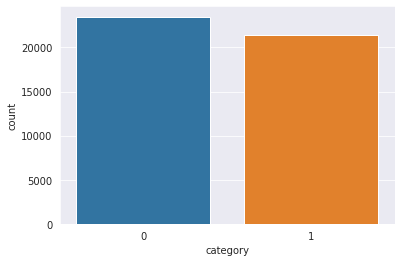

In [ ]:
import seaborn as sns

sns.set_style("darkgrid")
sns.countplot(df.category)

In [ ]:
#Here we are checking for missing values.

In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
#Next we analyze our subjects. We notice that subjects are different in each classification of news articles. We must now exclude this data.

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
#Univaraite Analysis of Subject for the True News Classificaton

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'politicsNews'), Text(0, 0, 'politicsNews')]

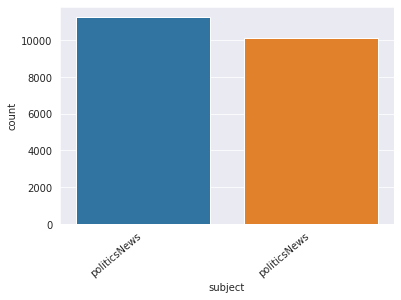

In [ ]:
true_cat = sns.countplot(true.subject)
true_cat.set_xticklabels(labels=true.subject ,rotation=40, ha="right")

In [ ]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
#Univaraite Analysis of Subject for the Fake News Classificaton

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

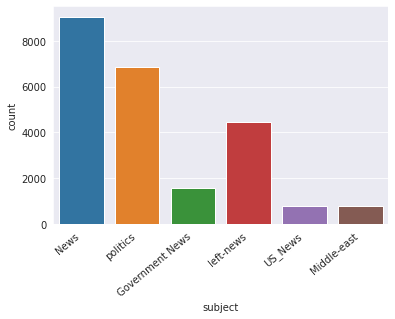

In [ ]:
ax = sns.countplot(fake.subject)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [ ]:
len(df)

44898

# Data Normalization & Test/Train Split

In [ ]:
#Here we are merging the title with the text of the article into one column.

In [ ]:
df['text'] = df['title'] + " " + df['text']

In [ ]:
#We are also removing the date, subject, and title from the dataframe.

In [ ]:
del df['title']
del df['subject']
del df['date']

In [ ]:
#We are now removing the stopwords that do not add much meaning to sentances. They are ignored without removing meaning.

In [ ]:
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
len(df)

44898

In [ ]:
df.head()

,text,category
0,"U.S. budget fight looms, Republicans flip fisc...",1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much more' ...,1


In [ ]:
#next we are normalizing our data by removing extra spaces and url links. We are also converting all text to lowercase.

In [ ]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

df['text'] = normalize(df['text'])

In [ ]:
df.head()

,text,category
0,u s budget fight looms republicans flip fiscal...,1
1,u s military accept transgender recruits monda...,1
2,senior u s republican senator let mr mueller j...,1
3,fbi russia probe helped australian diplomat ti...,1
4,trump wants postal service charge much more am...,1


In [ ]:
#Here we assigned the news data to the train_test_split function with a test ratio of 20%. This will allow us to learn from the training data and test our model with the test set.

In [ ]:
features = df['text']
targets = df['category']

x_train,x_test,y_train,y_test = train_test_split(features, targets, test_size=0.2, random_state=7)

In [ ]:
len(x_train)

35918

In [ ]:
x_train.head()

15852    family s c shooting victim message al sharpton...
16604    bad venezuela socialism s endgame sucks bad ve...
20950    machete attacker mohamed barry living u s gree...
21359    turkey never eu member erdogan germany s gabri...
11388    fujimori family pulls peru back political turm...
Name: text, dtype: object

# Tfid Vectorizer

In [ ]:
#A TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [ ]:
#Initialize TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Passive Agressive Classifier

In [ ]:
#Here we import the Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#The Passive Aggressive Classifier is an online learning technique that allows you to incrementally train a system by giving it instances in small groupings called mini-batches.

In [ ]:
#Passive-Aggressive algorithms are called so because:
#Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model.
#Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [ ]:
#Initialize PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

PassiveAggressiveClassifier(max_iter=50)

Accuracy: 99.54%


In [ ]:
print(score)

0.99543429844098


In [ ]:
if score <= .9:
  print('ALERT')
  print('Accuracy below threshold')

In [ ]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[4652,   23],
       [  18, 4287]])

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.995449514617377

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.9954045916821097

#Support Vector Machine

In [ ]:
#This approach to machine learning is has advantages in high dimensional spaces and are still effetive
#in cases where the number of dimensions is greater then the number of samples.

In [ ]:
# Classifier - Support Vector Machine
from sklearn import model_selection, svm
SVM = svm.SVC(C=1.9, kernel='linear')
SVM.fit(tfidf_train, y_train)
y_pred = SVM.predict(tfidf_test)
svm_cf_matrix = confusion_matrix(y_test, y_pred)
svm_cf_matrix

SVC(C=1.9, kernel='linear')

array([[4654,   21],
       [  20, 4285]])

In [ ]:
score_svm=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_svm*100,2)}%')

Accuracy: 99.54%


In [ ]:
if score_svm <= .9:
  print('ALERT')
  print('Accuracy below threshold')

In [ ]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.9954311303235264

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.9954220469552093

#Decision Tree

In [ ]:
#A decision tree approach is a smimilar to a flowchart structure with branches that represent a decision rule. Each leaf node represents an outcome.

In [ ]:
# Classifier - DecisionTree
from sklearn . tree import DecisionTreeClassifier
Dtr = DecisionTreeClassifier ( random_state =0)
Dtr.fit ( tfidf_train, y_train)
y_pred = Dtr.predict (tfidf_test)
score_Dtr=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_Dtr*100,2)}%')

DecisionTreeClassifier(random_state=0)

Accuracy: 99.62%


In [ ]:
score_Dtr=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_Dtr*100,2)}%')

Accuracy: 99.62%


In [ ]:
if score_Dtr <= .9:
  print('ALERT')
  print('Accuracy below threshold')

In [ ]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

In [ ]:
recall_score(y_test, y_pred, average='macro')

0.99616140913128

In [ ]:
precision_score(y_test, y_pred, average='macro')

0.9962551078852455